In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
%load_ext autoreload
from model.interp_proto import Explainer
from report import MODEL_CLASS,KeraSingle
ckpt_path = '/data/home/fangzhengqing/Result/KGDM_ablation/densenet121/protopnet/fold_0/lightning_logs/version_1/checkpoints/KGDM-densenet121-f0-epoch=53-acc=0.693572.ckpt'
ckpt_path2 = '/data/home/fangzhengqing/Result/KGDM_MAX/resnet50/pedl_bk/fold_0/lightning_logs/version_0/checkpoints/last.ckpt'
model1 = MODEL_CLASS['protopnet']('resnet50',f_dim=512,fmap_size=[12,12],num_classes=4,num_proto=10)
model2 = MODEL_CLASS['pedl'].load_from_checkpoint(ckpt_path2)
data = KeraSingle(64,8,384,0,5)
model = Explainer(model2)
data.setup('fit') 
data.setup('test') 
print(model1.protolayer.indepent_loss())
print(model2.protolayer.indepent_loss())
print(model1.protolayer.weight)
print(model2.protolayer.weight)

tensor(0.9992, grad_fn=<MeanBackward0>)
tensor(1.0377, grad_fn=<MeanBackward0>)
Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)
Parameter containing:
tensor([[0.7074, 0.7079, 0.7079, 0.7079, 0.7089, 0.7080, 0.6947, 0.7279, 0.7052,
         0.7055],
        [0.7283, 0.7352, 0.7293, 0.7034, 0.7321, 0.7246, 0.7337, 0.7328, 0.7138,
         0.7320],
        [0.5727, 0.5670, 0.5341, 0.6125, 0.5345, 0.5394, 0.5541, 0.5414, 0.5650,
         0.5825],
        [0.5492, 0.6351, 0.5589, 0.5502, 0.5420, 0.6312, 0.5514, 0.5587, 0.5727,
         0.6696]], requires_grad=True)


In [3]:
model1.protolayer.prototype.norm(dim=-1,keepdim=True).mean()

tensor(0.1388, grad_fn=<MeanBackward0>)

In [4]:
import torch
(2048**-0.5*torch.randn([40,2048])).norm(dim=-1)

tensor([0.9879, 0.9893, 1.0012, 0.9875, 1.0232, 1.0015, 1.0176, 1.0058, 0.9992,
        0.9964, 1.0169, 0.9836, 0.9950, 1.0277, 1.0178, 0.9974, 0.9816, 1.0056,
        0.9992, 1.0125, 0.9906, 1.0177, 1.0100, 1.0112, 1.0107, 0.9864, 0.9668,
        0.9966, 1.0130, 1.0142, 0.9885, 0.9744, 1.0072, 0.9543, 0.9974, 0.9902,
        1.0190, 1.0196, 1.0131, 0.9840])

In [5]:
model1.protolayer.prototype

Parameter containing:
tensor([[[-0.0540, -0.0203,  0.0234,  ..., -0.0105, -0.0071,  0.0447],
         [-0.0137, -0.0083, -0.0245,  ..., -0.0240,  0.0192,  0.0185],
         [-0.0024,  0.0106, -0.0014,  ...,  0.0071,  0.0401, -0.0322],
         ...,
         [-0.0045,  0.0023, -0.0040,  ...,  0.0294, -0.0340,  0.0022],
         [ 0.0165,  0.0058, -0.0004,  ..., -0.0187,  0.0488,  0.0152],
         [-0.0174,  0.0139,  0.0161,  ..., -0.0190, -0.0336,  0.0084]]],
       requires_grad=True)

In [6]:
%autoreload 2

model.cuda()
model.construct_prototypes(data.train_dataloader())

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[0.44739723205566406, 0.48560094833374023, 0.5067859888076782, 0.49316683411598206, 0.4832691252231598, 0.45891785621643066, 0.8839526772499084, 0.49634596705436707, 0.5261159539222717, 0.5104013085365295, 0.48126348853111267, 0.45439890027046204, 0.49868667125701904, 0.9164457321166992, 0.49868395924568176, 0.5055823922157288, 0.49092912673950195, 0.47950074076652527, 0.5166909098625183, 0.47709983587265015, 0.5879729986190796, 0.456723153591156, 0.5064237713813782, 0.9660426378250122, 0.4993060827255249, 0.5184301733970642, 0.4766896963119507, 0.548349142074585, 0.6837410926818848, 0.495906800031662, 0.5252884030342102, 0.9795364141464233, 0.5694453716278076, 0.502885103225708, 0.5123904943466187, 0.6371786594390869, 0.5475115776062012, 0.5369255542755127, 0.6561835408210754, 0.38486921787261963]


(-0.5, 15359.5, 767.5, -0.5)

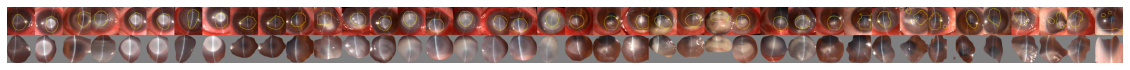

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
# vc0 = model.prototypes[0][1].example_visual_concepts[0]
# img =  model.prototypes[2][5]._visualize_()
plt.figure(figsize=(20,2))
show = lambda x: plt.imshow(x[:,:,::-1]) and plt.axis('off')
imgs =  [model.prototypes[i//10][i%10].visual_concept()._visualize_() for i in range(40) if len(model.prototypes[i//10][i%10].example_visual_concepts)>0]
vcs = [len(model.prototypes[i//10][i%10].example_visual_concepts) for i in range(40)]
print(vcs)
vc_dist =  [model.prototypes[i//10][i%10].visual_concept().self_dist().item() for i in range(40) if len(model.prototypes[i//10][i%10].example_visual_concepts)>0]
print(vc_dist)
show(np.concatenate(imgs,1))

(-0.5, 383.5, 767.5, -0.5)

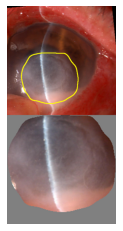

In [8]:
plt.figure(figsize=(40,4))
show(imgs[15])

In [10]:

batch = next(iter(data.test_dataloader()[0]))
res = model.interpret(batch['img'].cuda())


In [11]:

def visual_res(r):
    originimage = np.uint8(255*r['vcs'][0].img.permute(1,2,0).flip(2))
    h,w = originimage.shape[0:2]
    originimage = cv2.resize(originimage, [h*3,w*3], interpolation=cv2.INTER_CUBIC)
    img1 = np.concatenate([i._visualize_(True,False) for i in r['vcs']],0)
    img2 = np.concatenate([p._nearst_(r['vcs'][i].cv,1)._visualize_(False,False, False) for i,p in enumerate(r['protos'])],0)
    return np.concatenate([originimage,img1,img2],1)
# for i in range(64):
#     show(visual_res(res[i]))
#     plt.savefig(f"test_result/visual/{i}.png")

In [12]:
# res[30].keys()
msg = lambda r: [f"kmp{r['pids'][i]}_gt:{r['protos'][i].gt}_sim:{r['cosvalue'][i]:.3f}_w:{r['weight'][i]:.3f}=score:{r['score'][i]:.3f}" for i in range(3)]
msg(res[30])

['kmp23_gt:2_sim:0.916_w:0.612=score:0.561',
 'kmp28_gt:2_sim:0.638_w:0.565=score:0.361',
 'kmp20_gt:2_sim:0.534_w:0.573=score:0.306']

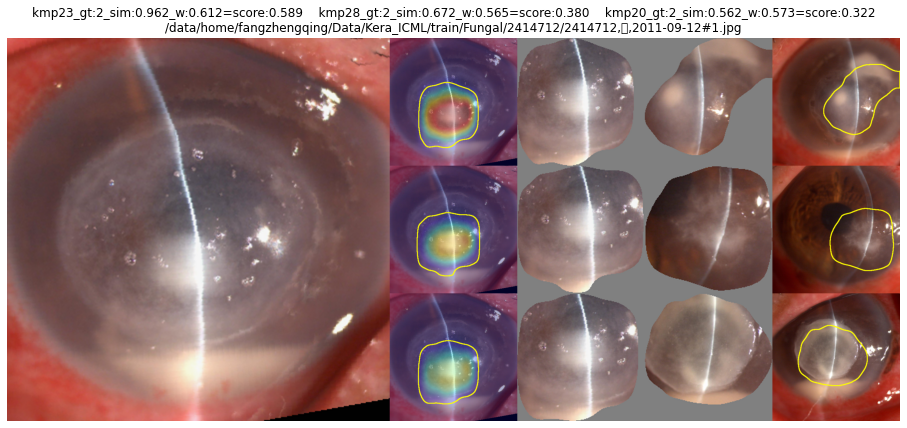

In [24]:
def explain_show(res_to_show, path):
    plt.figure(figsize=(16,8))
    show(visual_res(res_to_show))
    message = msg(res_to_show)
    plt.title('    '.join(message)+f'\n{path}')
    # plt.xlabel(path)

explain_show(res[0],batch['path'][0])


In [22]:
batch.keys()

dict_keys(['path', 'gt', 'img'])

In [25]:
for j, batch in enumerate(iter(data.test_dataloader()[0])):
    res = model.interpret(batch['img'].cuda())
    for i in range(64):
        explain_show(res[i],batch['path'][i])
        plt.savefig(f"test_result/visual_explain/{j*64+i}.pdf")
        plt.close()

IndexError: list index out of range

In [15]:
model3 = MODEL_CLASS['pedl']('resnet50',f_dim=512,fmap_size=[12,12],num_classes=4,num_proto=10)

In [16]:
impo

NameError: name 'impo' is not defined